*   Term Project
*   Ryan Frank
*   Github Repository: https://github.com/ryfrank/DSC530-FinalProject

# Statistical Question/Hypothesis

My statistical question is how much of an effect does education have on income, and what other influcences can I find?

# Data Source

I sourced my data from an extract I created on https://usa.ipums.org/usa/ from the 2022 US Government Census Data

In [9]:
# download my census extract
# usual download function to get provided libraries
from os.path import basename, exists
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)
    else:
        print(f"{filename} already exists")
download("https://github.com/ryfrank/DSC530-FinalProject/raw/main/usa_00003.csv.gz")

usa_00003.csv.gz already exists


In [11]:
# unzip file
import gzip
import shutil
if not exists("usa_00003.csv"):
    print("Extracting usa_00003.csv from usa_00003.csv.gz")
    with gzip.open("usa_00003.csv.gz", "rb") as f_in:
        with open("usa_00003.csv", "wb") as f_out:
            shutil.copyfileobj(f_in, f_out)

In [13]:
# load to data frame
import pandas
censusData = pandas.read_csv("usa_00003.csv")

# Variables

INCWAGE <br>
&nbsp;&nbsp;&nbsp;&nbsp;This is the wage and salary income of the respondent, pre-tax, in 2022 US Dollars (as we are only looking at the 2022 sample, I don't have to adjust other years incomes for inflation).  This is going to be the dependant variable for my modeling based on my statisical question

In [19]:
# get basic details on variable
censusData["INCWAGE"].describe()

count    3.373378e+06
mean     1.965124e+05
std      3.649164e+05
min      0.000000e+00
25%      0.000000e+00
50%      2.500000e+04
75%      9.400000e+04
max      9.999990e+05
Name: INCWAGE, dtype: float64

(array([1.61464e+05, 1.72960e+05, 1.83514e+05, 1.59635e+05, 1.34665e+05,
        1.14241e+05, 8.86070e+04, 6.96720e+04, 5.04940e+04, 5.33340e+04,
        2.60100e+04, 3.26310e+04, 1.89350e+04, 1.45050e+04, 2.04370e+04,
        9.92800e+03, 8.78000e+03, 8.00800e+03, 4.04200e+03, 1.28510e+04,
        2.78700e+03, 4.16800e+03, 2.25100e+03, 2.06700e+03, 6.24500e+03,
        1.27900e+03, 1.53700e+03, 1.20200e+03, 6.14000e+02, 4.13400e+03,
        4.20000e+02, 6.47000e+02, 3.49000e+02, 2.77000e+02, 1.23000e+03,
        5.08000e+02, 2.70000e+02, 1.91000e+02, 1.10000e+02, 1.22000e+03,
        4.92000e+02, 5.47000e+02, 4.80000e+01, 1.36000e+02, 4.06000e+02,
        2.32000e+02, 5.40000e+01, 1.67900e+03, 1.35700e+03, 4.75000e+02,
        7.83000e+02, 3.07000e+02, 2.37800e+03, 1.20900e+03, 1.00000e+00,
        4.17000e+02, 1.57500e+03, 5.68000e+02, 0.00000e+00, 0.00000e+00,
        9.85000e+02, 5.41000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.22100e+03, 0.00

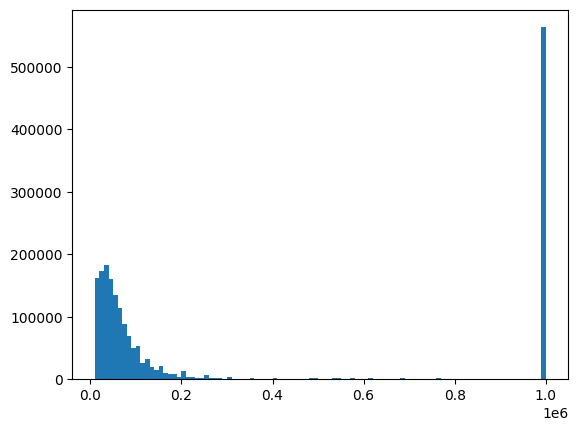

In [42]:
# show histogram for variable
import matplotlib.pyplot as plt 
# create bins of 10,000$ ranges
bins = []
for i in range(100):
    bins.append((i+1)*10000)

plt.hist(censusData["INCWAGE"], bins=bins)

NCHILD <br>
&nbsp;&nbsp;&nbsp;&nbsp;This is the number of own children in the household.  I selected this to use as a proxy for choices made that could effect income - having more children at home could indicate that career choices are made that would effect income to support that.

In [25]:
# get basic details on variable
censusData["NCHILD"].describe()

count    3.373378e+06
mean     4.711832e-01
std      9.296454e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      9.000000e+00
Name: NCHILD, dtype: float64

(array([2.478293e+06, 4.342190e+05, 2.992990e+05, 1.128400e+05,
        3.427400e+04, 9.291000e+03, 3.009000e+03, 1.137000e+03,
        5.660000e+02, 4.500000e+02]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

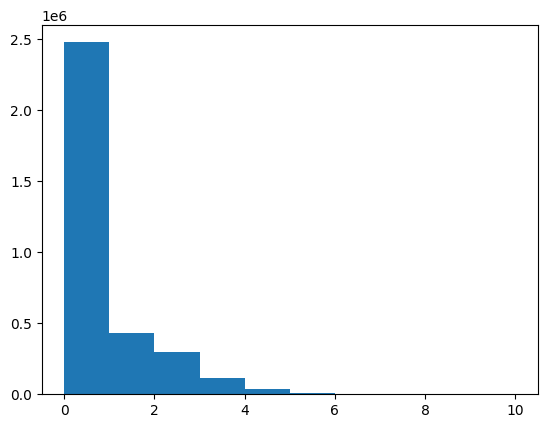

In [36]:
# histogram
plt.hist(censusData["NCHILD"], bins=[0,1,2,3,4,5,6,7,8,9,10])

AGE <br>
&nbsp;&nbsp;&nbsp;&nbsp;Respondants age - likely an influence on income as generally speaking your income will increase as your career progresses

In [30]:
# get basic details on variable
censusData["AGE"].describe()

count    3.373378e+06
mean     4.276808e+01
std      2.390891e+01
min      0.000000e+00
25%      2.200000e+01
50%      4.300000e+01
75%      6.300000e+01
max      9.700000e+01
Name: AGE, dtype: float64

(array([29769., 31053., 31989., 32730., 33755., 34639., 35777., 36087.,
        36069., 36596., 36706., 37812., 39475., 40620., 41112., 40763.,
        40955., 47404., 46663., 41958., 40038., 37451., 36496., 36036.,
        36868., 37149., 38006., 38834., 39563., 42082., 41826., 42723.,
        41611., 41066., 41524., 41542., 41479., 40854., 40666., 42490.,
        40962., 41026., 39044., 38404., 38682., 37010., 37804., 37588.,
        37980., 41548., 43340., 43272., 41880., 41354., 42299., 43373.,
        46213., 47677., 48218., 49692., 49949., 51090., 49912., 50302.,
        50293., 48586., 47368., 46610., 44794., 43640., 41074., 39670.,
        38529., 37944., 38145., 28827., 26458., 25833., 25274., 21784.,
        19236., 17301., 15905., 14278., 12542., 11382., 10165.,  8466.,
         6834.,  4855.,  2126.,  4813.,  4746.,  9660.,  7226.,   270.,
           90.,     0.,     0.]),
 array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  1

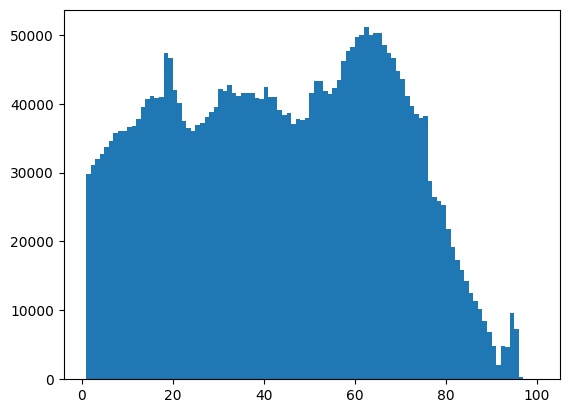

In [38]:
# plot histogram
bins = []
for i in range(100):
    bins.append(i+1)
plt.hist(censusData["AGE"], bins=bins)

EDUC - Education Attained <br>
Measure of level of education attained.  This is the primary independant variable that I'm interetested in<br>
Values:
00	N/A or no schooling <br>
01	Nursery school to grade 4 <br>
02	Grade 5, 6, 7, or 8 <br>
03	Grade 9 <br>
04	Grade 10 <br>
05	Grade 11 <br>
06	Grade 12 <br>
07	1 year of college <br>
08	2 years of college <br>
09	3 years of college <br>
10	4 years of college <br>
11	5+ years of college<br>

In [48]:
censusData["EDUC"].describe()

count    3.373378e+06
mean     6.371351e+00
std      3.266928e+00
min      0.000000e+00
25%      5.000000e+00
50%      6.000000e+00
75%      1.000000e+01
max      1.100000e+01
Name: EDUC, dtype: float64

(array([ 199822.,  233735.,  204087.,   65621.,   71044.,   81393.,
        1003224.,  366908.,  230535.,       0.,  556018.,  360991.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 <BarContainer object of 12 artists>)

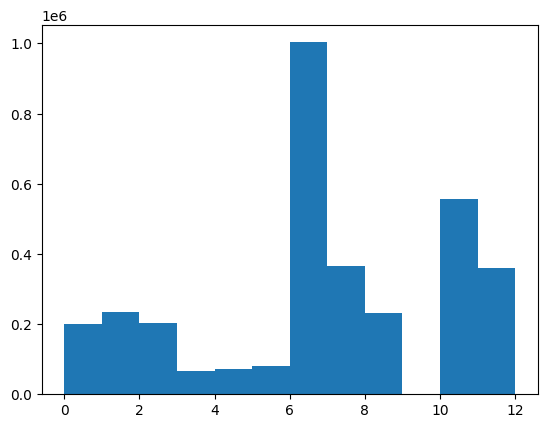

In [54]:
plt.hist(censusData["EDUC"], bins=[0,1,2,3,4,5,6,7,8,9,10,11,12])

MARST <br>
&nbsp;&nbsp;&nbsp;&nbsp;Marital status - Like number of children I believe this is a good proxy variable for a number of behaviors that might impact career decisions that would relate to income <br>
Values: <br>
1	Married, spouse present <br>
2	Married, spouse absent <br>
3	Separated <br>
4	Divorced <br>
5	Widowed <br>
6	Never married/single <br>
9	Blank, missing

(array([      0., 1382852.,   63717.,   41450.,  301831.,  185070.,
        1398458.,       0.,       0.,       0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

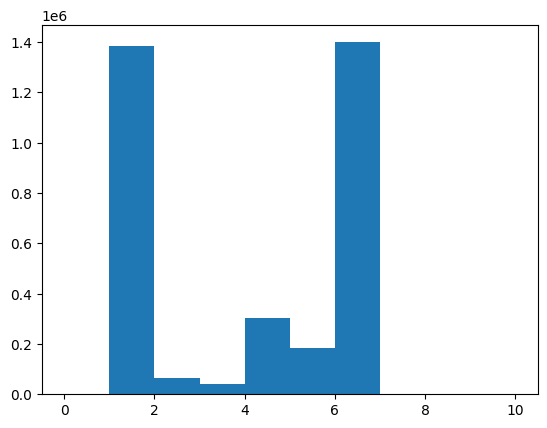

In [58]:
plt.hist(censusData["MARST"], bins=[0,1,2,3,4,5,6,7,8,9,10])

SEX <br>
&nbsp;&nbsp;&nbsp;&nbsp; Gender - I beileve this is also a useful proxy - especially when combined with married status and number of children. <br>
Values: <br>
1	Male <br>
2	Female <br>
9	Missing/blank <br>

(array([1656215., 1717163.]),
 array([1., 2., 3.]),
 <BarContainer object of 2 artists>)

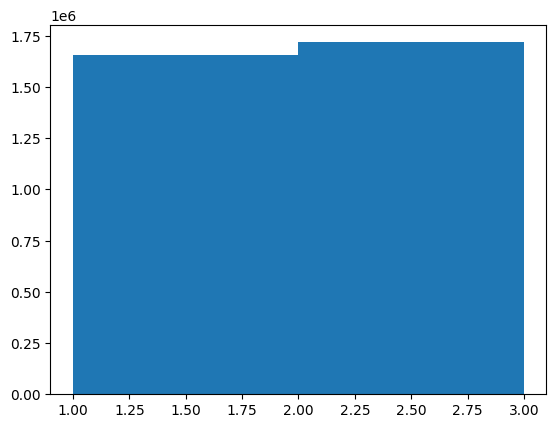

In [62]:
plt.hist(censusData["SEX"], bins=[1,2,3])

There are a couple of other varibles that I included in the pull but did not do detailed analysis on but use in either filtering or testing out different models:

* EMPSTAT - If the person is employed
* PWSTATE2 - State the primary work is done
* OCC - Code representing the occupation of the person
* PERWT - Representivie weight of individual record (used when doing weighted resampling)

# Cleaning Data and Outliers

In [70]:
# create a filtered version of the census data - attempting to use knowledge to limit records
# to those that we expect to have income that can be measured vs education
# EMPSTAT - indicates if person was part of the labor force - for my purposes I'm looking 
#where the value is 1 for Employed
censusDataFilter = censusData[censusData["EMPSTAT"] == 1]
# INCWAGE - wage and salary income for the prior year and codes for no data available
censusDataFilter = censusDataFilter[censusDataFilter["INCWAGE"] > 0]            # No income
censusDataFilter = censusDataFilter[censusDataFilter["INCWAGE"] != 999999]      # coded N/A
censusDataFilter = censusDataFilter[censusDataFilter["INCWAGE"] != 999998]      # coded Missing
# AGE - convert to a number and change type to int
censusDataFilter["AGE"] = censusDataFilter["AGE"].astype(int)
censusDataFilter.dropna(subset=["AGE"], inplace=True)
# remove records where the age is less than 19 - attempt to remove those who haven't entered the 
# workforce or haven't been working for a full year due to how the wage question works
censusDataFilter = censusDataFilter[censusDataFilter["AGE"] >= 19]
# remove missing data
censusDataFilter = censusDataFilter[censusDataFilter["AGE"] != 999]
# as we are also using gender, drop missing data
censusDataFilter = censusDataFilter[censusDataFilter["SEX"] != 3]
# remove where education is unknown
censusDataFilter = censusDataFilter[censusDataFilter["EDUC"] != 0]

In [72]:
# now remove outliers from income/wage data using the interquartile range
censusDataFilter["INCWAGE"].describe()

count    1.432705e+06
mean     6.647414e+04
std      7.845711e+04
min      4.000000e+00
25%      2.500000e+04
50%      4.800000e+04
75%      8.000000e+04
max      7.910000e+05
Name: INCWAGE, dtype: float64

In [74]:
# 1.5xIQR rule
Q1 = 25000
Q3 = 80000
IQR = Q3 - Q1
IQRmax = Q3 + IQR*1.5
IQRmin = Q1 - IQR*1.5
if IQRmin < 0:
    IQRmin = 0
print(f"Incomes outside the range of {IQRmin} - {IQRmax} will be considered outliers")


Incomes outside the range of 0 - 162500.0 will be considered outliers


In [76]:
# remove outliers
censusDataFilter = censusDataFilter[censusDataFilter["INCWAGE"] <= 162500]  

# Histograms Pre and Post Cleanup

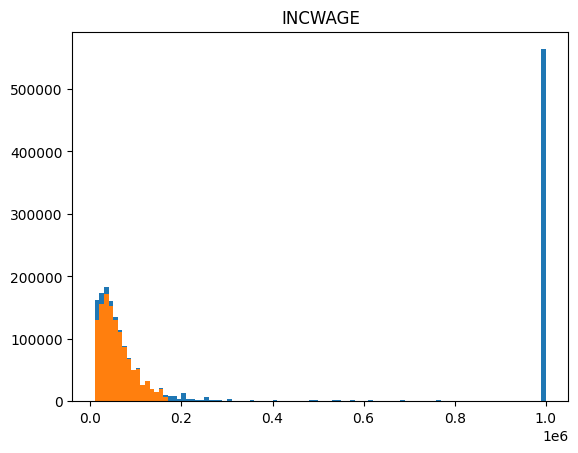

In [86]:
# INCWAGE
# create bins of 10,000$ ranges
bins = []
for i in range(100):
    bins.append((i+1)*10000)

plt.hist(censusData["INCWAGE"], bins=bins, label="All Data")
plt.hist(censusDataFilter["INCWAGE"], bins=bins, label="Cleaned Data")
plt.title("INCWAGE")
plt.show()

Most of the elimited records are those with no income data, and some at the lower end which is probably due to age.

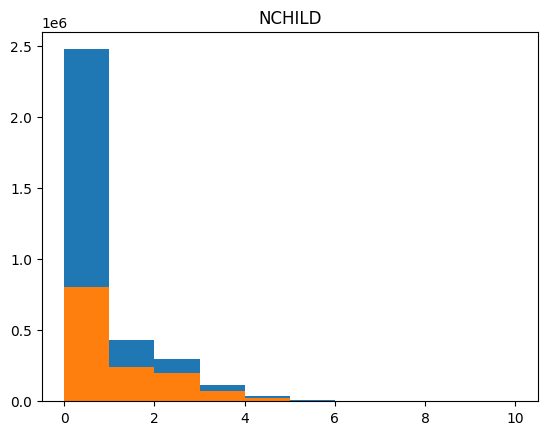

In [88]:
# NCHILD
plt.hist(censusData["NCHILD"], bins=[0,1,2,3,4,5,6,7,8,9,10])
plt.hist(censusDataFilter["NCHILD"], bins=[0,1,2,3,4,5,6,7,8,9,10])
plt.title("NCHILD")
plt.show()

Most of the zero children removed are due to those who are underage, while the removed from those that have children are likely individuals that do not work in order to care for thier children.

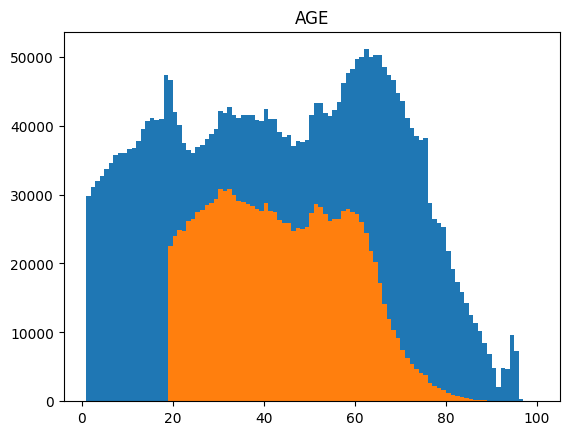

In [91]:
#AGE
bins = []
for i in range(100):
    bins.append(i+1)
plt.hist(censusData["AGE"], bins=bins)
plt.hist(censusDataFilter["AGE"], bins=bins)
plt.title("AGE")
plt.show()

The filter drops off all of the underage, is fairly even on number of people working for ages 19-60 and then starts tailing off as people retire.

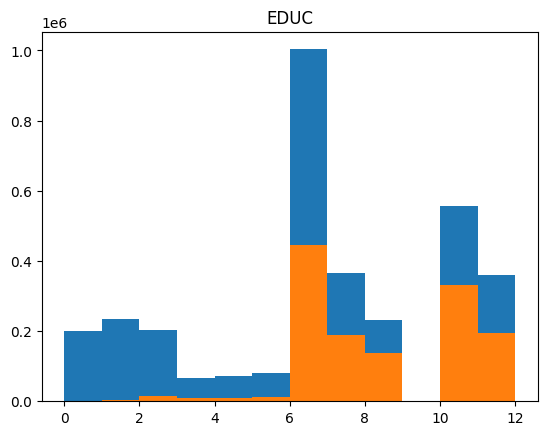

In [96]:
#EDUC
plt.hist(censusData["EDUC"], bins=[0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.hist(censusDataFilter["EDUC"], bins=[0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("EDUC")
plt.show()

Lower levels of education are mostly those who are underage, while the ones in higher levels are likely still in school so not part of the dataset.

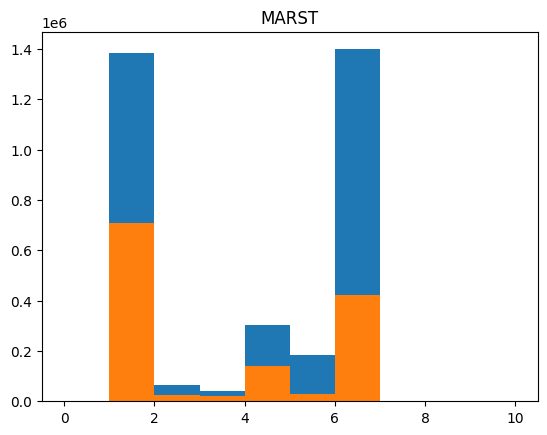

In [99]:
#MARST
plt.hist(censusData["MARST"], bins=[0,1,2,3,4,5,6,7,8,9,10])
plt.hist(censusDataFilter["MARST"], bins=[0,1,2,3,4,5,6,7,8,9,10])
plt.title("MARST")
plt.show()

Largest segments are 1 - married spouse present, and 6 - Never Married.  The drop off in never married is impacted by the underage, while those filtered out of group 1 are likely part of single income households.

(array([678514., 667786.]),
 array([1., 2., 3.]),
 <BarContainer object of 2 artists>)

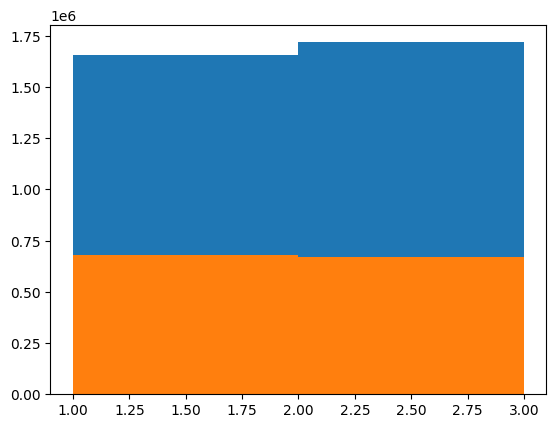

In [102]:
# SEX
plt.hist(censusData["SEX"], bins=[1,2,3])
plt.hist(censusDataFilter["SEX"], bins=[1,2,3])

Interestingly while there are more women in the overall data, the filtered data has very slightly more men.

# PMF Scenarios

In [109]:
# take advantage of provided code from think stats github distribution
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

thinkstats2.py already exists
thinkplot.py already exists


In [111]:
# import the provided libraries
import thinkstats2
import thinkplot

In [107]:
# first create a dictionary for income occurence - break into 20 buckets in bins of
# $10,000
incomeDataDict = {}
for i in range(0,20):
    xmin = i * 10000
    xmax = (i+1) * 10000
    cnt = censusDataFilter.query(f"INCWAGE >= {xmin} and INCWAGE < {xmax}").count()    
    #incomeDataDict[str(f"{xmin}-{xmax}")] = int(cnt["INCWAGE"])
    incomeDataDict[i+1] = int(cnt["INCWAGE"])
print(incomeDataDict)

{1: 123599, 2: 130713, 3: 155119, 4: 171915, 5: 152433, 6: 129670, 7: 110771, 8: 86224, 9: 67919, 10: 49438, 11: 52211, 12: 25584, 13: 32022, 14: 18607, 15: 14257, 16: 20009, 17: 5809, 18: 0, 19: 0, 20: 0}


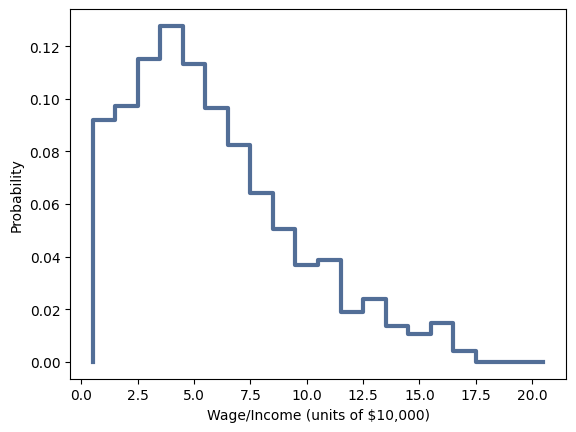

In [113]:
# PMF for income for cleaned and filtered data
pmf = thinkstats2.Pmf(incomeDataDict)
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel="Wage/Income (units of $10,000)", ylabel="Probability")

This is the probability mass function for all of the cleaned data

Now I want to examine two scenarios for income - one in which the individual has children living with them, and one where they do not

In [117]:
# now create PMF for each scenario
# split dataframe into each scenario
censusDataFilter_noChild = censusDataFilter[censusDataFilter["NCHILD"] == 0]  
censusDataFilter_child = censusDataFilter[censusDataFilter["NCHILD"] != 0]  

incomeDataDict_nochild = {}
for i in range(0,20):
    xmin = i * 10000
    xmax = (i+1) * 10000
    cnt = censusDataFilter_noChild.query(f"INCWAGE >= {xmin} and INCWAGE < {xmax}").count()    
    #incomeDataDict[str(f"{xmin}-{xmax}")] = int(cnt["INCWAGE"])
    incomeDataDict_nochild[i+1] = int(cnt["INCWAGE"])

incomeDataDict_child = {}
for i in range(0,20):
    xmin = i * 10000
    xmax = (i+1) * 10000
    cnt = censusDataFilter_child.query(f"INCWAGE >= {xmin} and INCWAGE < {xmax}").count()    
    #incomeDataDict[str(f"{xmin}-{xmax}")] = int(cnt["INCWAGE"])
    incomeDataDict_child[i+1] = int(cnt["INCWAGE"])


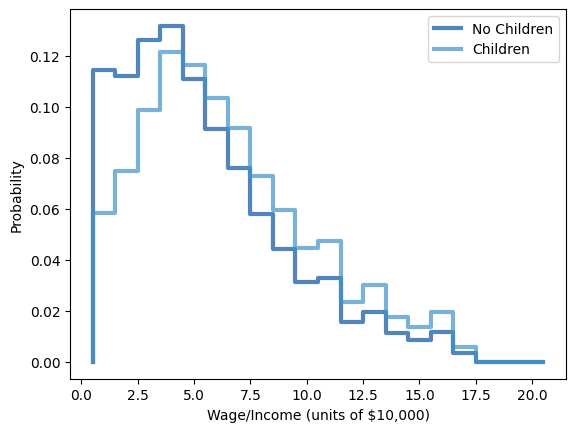

In [121]:
pmf_noChild= thinkstats2.Pmf(incomeDataDict_nochild, label="No Children")
pmf_child= thinkstats2.Pmf(incomeDataDict_child, label="Children")
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf_noChild, pmf_child])
thinkplot.Config(xlabel="Wage/Income (units of $10,000)", ylabel="Probability")

The function with children present shows a higher probability for higher incomes

# CDF for Income

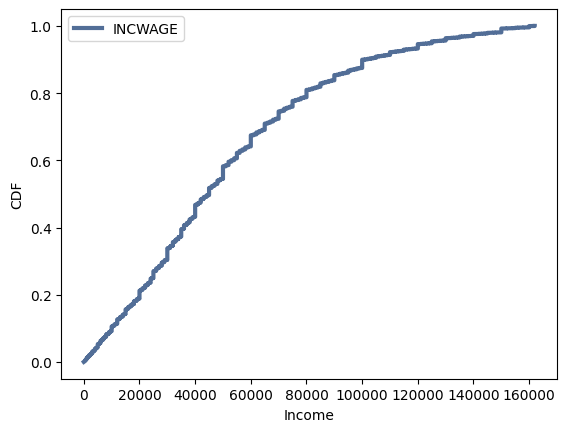

<Figure size 800x600 with 0 Axes>

In [125]:
# CDF
cdf = thinkstats2.Cdf(censusDataFilter["INCWAGE"], label="INCWAGE")
thinkplot.Cdf(cdf)
thinkplot.show(xlabel="Income", ylabel="CDF")

The shape of the cleaned data has a fairly uniform distribution of income until it hits around 70-80% and then the long right tail starts to show on the function

# Scatterplots And Weighted Resampling

In [131]:
import numpy
# create weighted sample - based on resampleweighted function provided in thinkstats2
weights = censusDataFilter["PERWT"].copy()
weights /= sum(weights)
indices = numpy.random.choice(censusDataFilter.index, 1000, replace=True, p=weights)
weightedCensusSample = censusDataFilter.loc[indices]

This creates a 1000 record sample weighted by the values in PERWT - using this for the following analysis

Text(0.5, 1.0, 'Age vs Income')

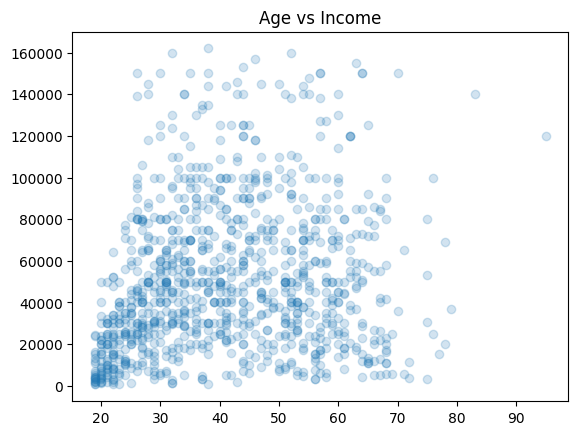

In [134]:
# scatter plot
plt.scatter(weightedCensusSample["AGE"], weightedCensusSample["INCWAGE"], alpha=0.2)
plt.title("Age vs Income")

While there is a lot of variablitiy there does appear to be a positive trend where income increases with age

In [137]:
# covariance
covariance = numpy.cov(weightedCensusSample["AGE"], weightedCensusSample["INCWAGE"])[0][1]
# Pearson's Correlation
pearsonCorr = thinkstats2.Corr(weightedCensusSample["AGE"], weightedCensusSample["INCWAGE"])

print(f"Covariance = {covariance}")
print(f"Pearson's Correlation = {pearsonCorr}")

Covariance = 98179.36342342342
Pearson's Correlation = 0.1926287560228886


While the covariance just tells us that there is a positive relationship between age and income, it does not tell us the strength.  The Person's Correlation does indicate that there is a clear positive correlation between age and income, which supports my thoughts at the start of this exercise where I wanted to include age for this reason.

Text(0.5, 1.0, 'Education vs Income')

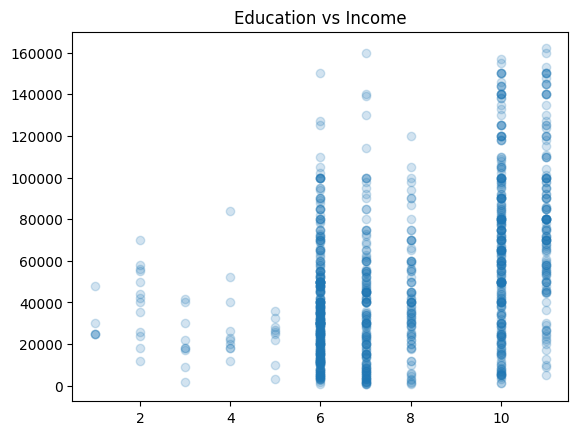

In [140]:
plt.scatter(weightedCensusSample["EDUC"], weightedCensusSample["INCWAGE"], alpha=0.2)
plt.title("Education vs Income")

This is less clear as the limited values for education creats lines in the scatter plot, however as the education increases the densisty of dots at the higher end of income increases, suggesting a positive relationship

In [143]:
# covariance
covariance = numpy.cov(weightedCensusSample["EDUC"], weightedCensusSample["INCWAGE"])[0][1]
# Pearson's Correlation
pearsonCorr = thinkstats2.Corr(weightedCensusSample["EDUC"], weightedCensusSample["INCWAGE"])

print(f"Covariance = {covariance}")
print(f"Pearson's Correlation = {pearsonCorr}")

Covariance = 33653.89708708708
Pearson's Correlation = 0.4300114658112693


As with age both the covariance and Pearson's Correlation indicate that there is a positive relationship between the variables.  The correlation indicates that the relationship is stronger than that of age as well.

# Hypothesis Testing

I am choosing to use the Pearson's Correlation as the test statistic for the hypothesis testing.

In [148]:
# testing a correlation
# based on provided code
# create a class based on hypothesisTest that will test correaltion between educ and incwage
class CorrTest (thinkstats2.HypothesisTest):
    def TestStatistic(self, data):
        # test statisticic is the Pearson's Correlation between series
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat
    def RunModel(self):
        # randomize the association between one variable and the other 
        xs, ys = self.data
        xs = numpy.random.permutation(xs)
        return(xs, ys)

In [150]:
# create resampled data set - this takes a while as the dataset is so large
weights = censusDataFilter["PERWT"].copy()
weights /= sum(weights)
indices = numpy.random.choice(censusDataFilter.index, len(censusDataFilter), replace=True, p=weights)
weightedCensusSample_complete = censusDataFilter.loc[indices]

data = weightedCensusSample_complete["EDUC"], weightedCensusSample_complete["INCWAGE"]
ctest = CorrTest(data)
# this will run 1000 iterations to see how likely random chance will produce the 
# correlation seen between education and income
print(ctest.PValue())

0.0


This result indicates that the p value of this test is less than 0.001 (1 in 1000) - the correlation seen between income and education is thus statistically significant and unlikely to be due to randomness in the data.

# Regression Analysis

I will build several models using the variables available to me to test the impact of education on income, and education combined with other factors.

In [155]:
# regression analysis
import statsmodels.formula.api as smf

# create training data - 10,000 records selected by sample weight
weights = censusDataFilter["PERWT"].copy()
weights /= sum(weights)
indices = numpy.random.choice(censusDataFilter.index, 10000, replace=True, p=weights)
weightedCensusSample_training = censusDataFilter.loc[indices]

In [157]:
# simple model using just education
model = smf.ols('INCWAGE ~ EDUC', data=weightedCensusSample_training)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                INCWAGE   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     1377.
Date:                Sat, 10 Aug 2024   Prob (F-statistic):          1.83e-282
Time:                        20:30:41   Log-Likelihood:            -1.1817e+05
No. Observations:               10000   AIC:                         2.363e+05
Df Residuals:                    9998   BIC:                         2.364e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6079.5149   1235.405      4.921      0.000    3657.873    8501.157
EDUC        5640.8600    152.023     37.105      0.000    5342.864    5938.856
==============================================================================
Omnibus:                      767.222   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              953.228
Skew:                           0.732   Prob(JB):                    1.02e-207
Kurtosis:                       3.376   Cond. No.                         31.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This simple mode shows that the model is statistically significant given the p-value for the EDUC coef.  The R squard is fairly low however at 0.121, indicating that only 12.1% of the change in income can be attributed to the increase in education attainment.

In [160]:
# create a model using the variables selected
# using ordinary least squares to predict Wages and Income based on
#   Age, Eduction Attained, Gender (done as sex==0 True/False for Male), NCHILD
model = smf.ols('INCWAGE ~ AGE + EDUC + SEX==0 + NCHILD == 0', data=weightedCensusSample_training)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                INCWAGE   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     651.5
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:32:50   Log-Likelihood:            -1.1792e+05
No. Observations:               10000   AIC:                         2.359e+05
Df Residuals:                    9996   BIC:                         2.359e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -5091.6096   1577.707     -3.227      0.001   -8184.233   -1998.986
SEX == 0[T.True]    -5.275e-11    1.6e-11     -3.298      0.001   -8.41e-11   -2.14e-11
NCHILD == 0[T.True] -8210.9673    653.158    -12.571      0.000   -9491.288   -6930.647
AGE                   393.8461     22.450     17.544      0.000     349.840     437.852
EDUC                 5580.5695    148.365     37.614      0.000    5289.744    5871.395
==============================================================================
Omnibus:                      681.350   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              834.264
Skew:                           0.667   Prob(JB):                    6.95e-182
Kurtosis:                       3.474   Cond. No.                     2.87e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.45e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

This model includes more of the variables I chose, and does show an improvement over using just education attainment, with an R squard of 0.164.  All of the variables I chose are statisically significant.

Finally I created a model using some of the additional variables that I had included in my data extract, expecially categorical data for state the individual worked, if they had children, and marraige status

In [164]:
# create a model using the variables selected
# add additionally available variables
model = smf.ols('INCWAGE ~ AGE + EDUC + SEX==0 + NCHILD == 0 + C(PWSTATE2) + C(OCC) + C(MARST)', data=weightedCensusSample_training)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                INCWAGE   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     12.35
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:35:14   Log-Likelihood:            -1.1609e+05
No. Observations:               10000   AIC:                         2.333e+05
Df Residuals:                    9444   BIC:                         2.373e+05
Df Model:                         555                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.014e+04   4553.306      8.816      0.000    3.12e+04    4.91e+04
SEX == 0[T.True]    -4.345e-08   6.07e-09     -7.163      0.000   -5.53e-08   -3.16e-08
NCHILD == 0[T.True] -4133.4929    641.328     -6.445      0.000   -5390.635   -2876.351
C(PWSTATE2)[T.1]     5313.0847   3042.891      1.746      0.081    -651.636    1.13e+04
C(PWSTATE2)[T.2]     2.036e+04   6265.202      3.250      0.001    8080.403    3.26e+04
C(PWSTATE2)[T.4]     1.315e+04   2778.354      4.732      0.000    7701.433    1.86e+04
C(PWSTATE2)[T.5]     6246.3074   3737.999      1.671      0.095   -1080.975    1.36e+04
C(PWSTATE2)[T.6]     1.483e+04   2199.821      6.739      0.000    1.05e+04    1.91e+04
C(PWSTATE2)[T.8]     9764.5896   2902.907      3.364      0.001    4074.268    1.55e+04
C(PWSTATE2)[T.9]     1.221e+04   3395.326      3.595      0.000    5550.768    1.89e+04
C(PWSTATE2)[T.10]    1.471e+04   5843.579      2.518      0.012    3256.841    2.62e+04
C(PWSTATE2)[T.11]    2.433e+04   5206.133      4.673      0.000    1.41e+04    3.45e+04
C(PWSTATE2)[T.12]    7898.2202   2323.315      3.400      0.001    3344.023    1.25e+04
C(PWSTATE2)[T.13]    7822.2113   2546.622      3.072      0.002    2830.284    1.28e+04
C(PWSTATE2)[T.15]     1.73e+04   4476.308      3.866      0.000    8529.072    2.61e+04
C(PWSTATE2)[T.16]    1.014e+04   4244.117      2.388      0.017    1816.158    1.85e+04
C(PWSTATE2)[T.17]    1.193e+04   2504.886      4.764      0.000    7023.983    1.68e+04
C(PWSTATE2)[T.18]    9989.3635   2835.318      3.523      0.000    4431.531    1.55e+04
C(PWSTATE2)[T.19]    8426.6405   3563.067      2.365      0.018    1442.263    1.54e+04
C(PWSTATE2)[T.20]    6625.5859   3930.202      1.686      0.092   -1078.457    1.43e+04
C(PWSTATE2)[T.21]    7054.0232   3249.800      2.171      0.030     683.715    1.34e+04
C(PWSTATE2)[T.22]    7910.3944   3247.038      2.436      0.015    1545.502    1.43e+04
C(PWSTATE2)[T.23]    7823.7035   4464.684      1.752      0.080    -928.038    1.66e+04
C(PWSTATE2)[T.24]    1.466e+04   3018.655      4.858      0.000    8746.269    2.06e+04
C(PWSTATE2)[T.25]    1.485e+04   2755.972      5.387      0.000    9444.123    2.02e+04
C(PWSTATE2)[T.26]    8029.3105   2633.505      3.049      0.002    2867.074    1.32e+04
C(PWSTATE2)[T.27]    1.415e+04   2954.516      4.788      0.000    8355.051    1.99e+04
C(PWSTATE2)[T.28]     1.03e+04   4068.842      2.531      0.011    2323.055    1.83e+04
C(PWSTATE2)[T.29]    4175.0121   2871.870      1.454      0.146   -1454.471    9804.496
C(PWSTATE2)[T.30]    6270.0378   4843.429      1.295      0.196   -3224.126    1.58e+04
C(PWSTATE2)[T.31]    5658.2137   4178.532      1.354      0.176   -2532.609    1.38e+04
C(PWSTATE2)[T.32]     1.02e+04   3602.175      2.832      0.005    3139.083    1.73e+04
C(P

This model shows improved preformance with a R-squared of 0.421 (although the adjusted 0.386 may be more accurate).  In either case this is better than the other models I produced.  While not all of the categorical options are statistically significant, most are and seem to indicate that this is the superior model of the 3 I created.

# Conclusions

While there are many factors that contribute, to answer my question, there is a clear relationship between education and income.  The additional factors that I identified include age (could probably be refined to career length), children, marraige status, location and specific occupation.